<font size="6">**DSCI100 Group24 Project Report - Predicting Heart Disease**</font>

<br><font size="4">**Introduction:**</font>
<br>
<br>Heart disease is the leading cause of death worldwide, accounting for a significant portion of global mortality. It is a complex condition influenced by numerous factors, including genetics, lifestyle, and environmental aspects. Early detection and prevention of heart disease are crucial for reducing its impact on public health. Some key risk factors associated with heart disease include age, chest pain, and serum cholesterol levels. Heart disease is a serious issue affecting many people worldwide. There are several types of heart disease, including Blood vessel diseases, such as coronary artery disease, Irregular heartbeats, congenital heart defects, disease of the heart muscle, and heart valve disease (Mayo Clinic, 2022).

In this study, we will explore and predict if a person has heart disease, given their attributes. We will be trying to answer the question: Can we predict the presence of heart disease in individuals using age, chest pain, and serum cholesterol levels?

The dataset used in this project contains information on individuals with and without heart disease. It consists of several variables: age, chest pain type, and serum cholesterol in mg/dl. The dataset comprises the following columns:
1. age: The age of the individual in years (numeric).
2. cp: The type of chest pain experienced by the individual, represented as a numerical value <br>(1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic).
3. chol: The individual's serum cholesterol level in mg/dl (numeric).
4. heart_disease: The diagnosis of heart disease (angiographic disease status)<br>(0: indicates the absence of heart disease, 1: indicates the presence of heart disease, 2: indicates the presence of heart disease, 3: indicates the presence of heart disease).

This dataset will be used to train and test a classification model to predict the presence of heart disease based on the chosen predictors.

<img src="download.jpeg" width = "400"/>
<img src="hd.jpg" width = "400"/>

<br>We will use the following packages to analyze our dataset:

In [38]:
library(tidyverse)
library(tidymodels)
library(repr)
library(digest)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 10)

<font size="4">**Methods:**</font>

We will be setting the seed to 1 to make sure our results are reproducible:

In [45]:
set.seed(1)

<font size="3">**Loading, Wrangling and Cleaning:**</font>

In [50]:
data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names=c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"))

data_mutated = data |>
  mutate(heart_disease = case_when(num == 0 ~ "absent",
                                   num == 1 ~ "presence",
                                   num == 2 ~ "presence",
                                   num == 3 ~ "presence")) |> 
select(-num)

print("Table 1: The dataset used in this data analysis.")
data_mutated

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Table 1: The dataset used in this data analysis."


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,absent
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,presence
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,presence
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,absent
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,absent
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,presence
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,presence
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,presence


We have mutated the data so that in the num column, which is the diagnosis of heart disease, 0 will equal no heart disease, and any other number will be changed to equal having heart disease. 

We will use classification to predict whether or not age, chest pain type, cholesterol, and maximum heart rate are predictors of heart disease.


In [51]:
data_clean <- data_mutated |>
  mutate(heart_disease = as.factor(heart_disease)) |>
  select(age,cp,chol,heart_disease) |>
  filter(!is.na(heart_disease))

print("Table 2: The dataset used for data analysis after wrangling and cleaning.")
data_clean

[1] "Table 2: The dataset used for data analysis after wrangling and cleaning."


age,cp,chol,heart_disease
<dbl>,<dbl>,<dbl>,<fct>
63,1,233,absent
67,4,286,presence
67,4,229,presence
37,3,250,absent
41,2,204,absent
⋮,⋮,⋮,⋮
45,1,264,presence
68,4,193,presence
57,4,131,presence


We have cleaned and wrangled the data by selecting the columns we will use for classification. Also, we deleted the observations, which is NA for heart_disease.

<font size="3">**Training and Testing Data:**</font>

Here we are spliting the data into training and testing data sets. We do this to use the training set to “train” the classifier. Then, we can use the classifier to make predictions on new data. We will need to scale the data to ensure all data observations are comparable and contribute equal shares to calculating the distance between points (Tiffany Timbers, 2022). We chose 75% for the training set and 25% for the testing set because it provides a good balance of training the model and evaluating the model.

In [52]:
heart_split <- initial_split(data_clean, prop = 0.75, strata=heart_disease)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

The following two table shows the number of observations in each class, as well as the mean, max, min, sd, median of each predictors.

In [43]:
summary_table_individual <- heart_train |>
  group_by(heart_disease) |>
  summarise(total = n(),
    age_max = max(age, na.rm = TRUE),
    age_min = min(age, na.rm = TRUE),
    age_sd = sd(age, na.rm = TRUE),
    age_n = sum(!is.na(age)),
    age_median = median(age, na.rm = TRUE),
    
    cp_max = max(cp, na.rm = TRUE),
    cp_min = min(cp, na.rm = TRUE),
    cp_sd = sd(cp, na.rm = TRUE),
    cp_n = sum(!is.na(cp)),
    cp_median = median(cp, na.rm = TRUE),
    
    chol_max = max(chol, na.rm = TRUE),
    chol_min = min(chol, na.rm = TRUE),
    chol_sd = sd(chol, na.rm = TRUE),
    chol_n = sum(!is.na(chol)),
    chol_median = median(chol, na.rm = TRUE))

print("Table 3: The dataset used in this data analysis.")
summary_table_individual

summary_table_total <- heart_train |>
  summarise(total = n(),
    age_max = max(age, na.rm = TRUE),
    age_min = min(age, na.rm = TRUE),
    age_sd = sd(age, na.rm = TRUE),
    age_n = sum(!is.na(age)),
    age_median = median(age, na.rm = TRUE),
    
    cp_max = max(cp, na.rm = TRUE),
    cp_min = min(cp, na.rm = TRUE),
    cp_sd = sd(cp, na.rm = TRUE),
    cp_n = sum(!is.na(cp)),
    cp_median = median(cp, na.rm = TRUE),
    
    chol_max = max(chol, na.rm = TRUE),
    chol_min = min(chol, na.rm = TRUE),
    chol_sd = sd(chol, na.rm = TRUE),
    chol_n = sum(!is.na(chol)),
    chol_median = median(chol, na.rm = TRUE))

print("Table 4: The dataset used in this data analysis.")
summary_table_total 

heart_disease,total,age_max,age_min,age_sd,age_n,age_median,cp_max,cp_min,cp_sd,cp_n,cp_median,chol_max,chol_min,chol_sd,chol_n,chol_median
<fct>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
absent,123,76,29,9.805431,123,53,4,1,0.9772161,123,3,417,157,46.16418,123,235
presence,94,70,35,7.620045,94,57,4,1,0.7940525,94,4,409,131,50.77960,94,249


total,age_max,age_min,age_sd,age_n,age_median,cp_max,cp_min,cp_sd,cp_n,cp_median,chol_max,chol_min,chol_sd,chol_n,chol_median
<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
217,76,29,9.007528,217,55,4,1,0.985667,217,3,417,131,48.1769,217,240


<br>The following graphs show the relationship between the predictors and outcome. As we can see, when a person is experiencing asymptomatic chest pain, it's most likely he has a heart disease presence.

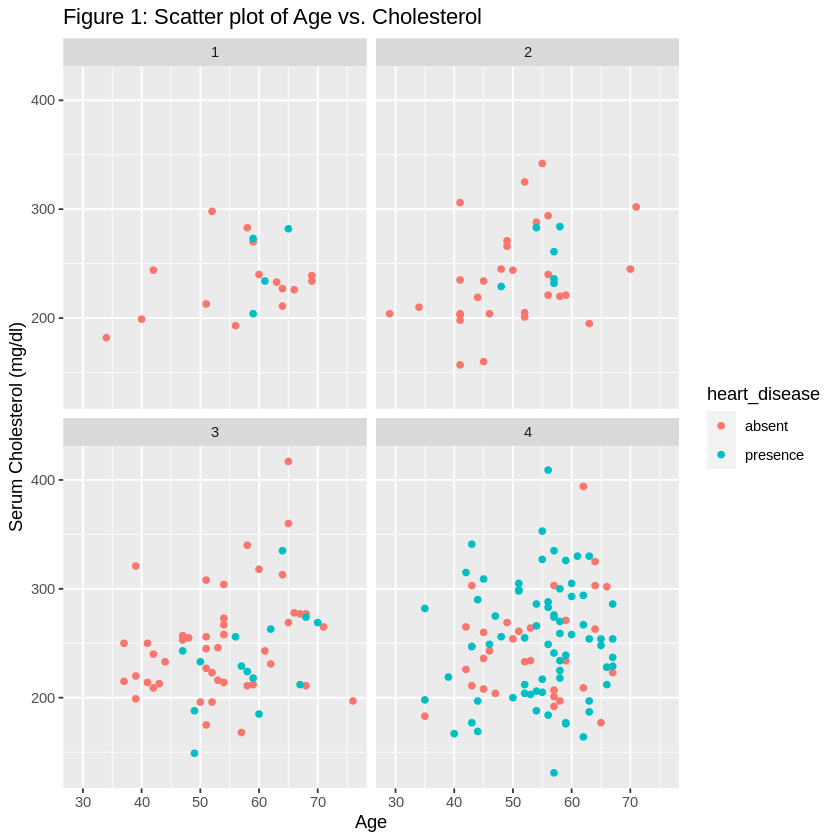

In [44]:
scatter_plot_faceted <- ggplot(heart_train, aes(x = age, y = chol, color = heart_disease)) +
  geom_point() +
  labs(title = "Figure 1: Scatter plot of Age vs. Cholesterol",
       x = "Age",
       y = "Serum Cholesterol (mg/dl)") +
  facet_wrap(~ cp)

scatter_plot_faceted

<font size="4">**Methods:**</font>
<br>
<br> We plan to mutate the data so that 0= no heart disease, any other number = heart disease. We will use classification to predict whether or not age, chest pain type, resting blood pressure, cholesterol and maximum heart rate are predictors of heart disease. The variables we will use will be  age (in years), sex: sex (1 = male; 0 = female), painloc: chest pain location (1 = substernal; 0 = otherwise),cp: chest pain type (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic), trestbps: resting blood pressure (in mm Hg on admission to the hospital), chol: serum cholesterol in mg/dl,smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker), cigs (cigarettes per day), years (number of years as a smoker). We will use the scatterplot to veiw our results.

In [26]:
#need to rewrite this part 

<br>We first created a heart_recipe that defines a recipe for predicting heart_disease based on the age, chol, and cp variables. The recipe includes steps to scale and center all predictor variables to make sure they are standardized; this ensures all data observations will be on a comparable scale and contribute equal shares to the calculation of the distance between points. We also created a 5-fold cross-validation object (training_vfold) to perform cross-validation on the training dataset (heart_train). The cross-validation is stratified based on the heart_disease variable to ensure each fold has a similar distribution of heart disease cases. We chose v = 5 because it leads to a faster compuation time.

In [27]:
heart_recipe<-recipe(heart_disease~age+chol+cp, data=heart_train)|>
  step_scale(all_predictors())|>
  step_center(all_predictors())

training_vfold<-vfold_cv(heart_train, v=5,strata=heart_disease)

<br>Next we put everything into a workflow to see what is the number of k-neighbours that give us the best accuracy.

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
16,accuracy,binary,0.7324927,5,0.01293799,Preprocessor1_Model04
21,accuracy,binary,0.7142001,5,0.02170714,Preprocessor1_Model05
11,accuracy,binary,0.7139887,5,0.01965400,Preprocessor1_Model03
26,accuracy,binary,0.7053206,5,0.03763576,Preprocessor1_Model06
31,accuracy,binary,0.6911507,5,0.02399278,Preprocessor1_Model07
⋮,⋮,⋮,⋮,⋮,⋮,⋮
76,accuracy,binary,0.6680006,5,0.01265056,Preprocessor1_Model16
56,accuracy,binary,0.6635558,5,0.02379876,Preprocessor1_Model12
61,accuracy,binary,0.6546864,5,0.01746116,Preprocessor1_Model13


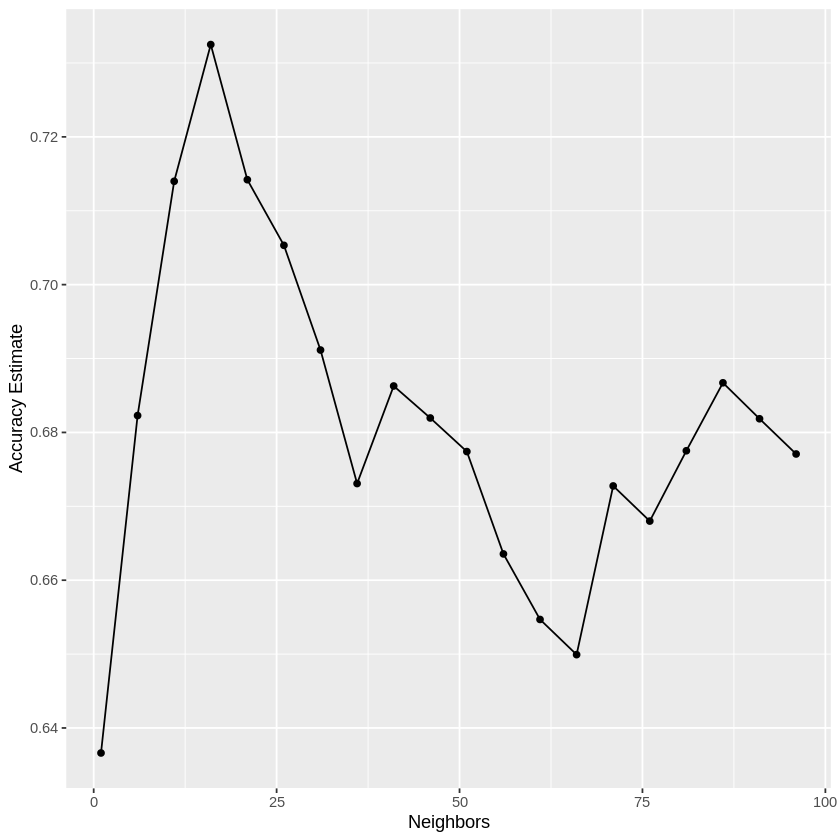

In [28]:
set.seed(1)
knn_spec<-nearest_neighbor(weight_func = "rectangular",neighbors = tune())|>
set_engine("kknn")|>
set_mode("classification")

k=tibble(neighbors=seq(1,100,5))


training_workflow<-workflow()|>
add_recipe(heart_recipe)|>
add_model(knn_spec)|>
tune_grid(resamples=training_vfold, grid=k)|>
collect_metrics()

accuracy<-training_workflow|>
filter(.metric=="accuracy") |>
arrange(desc(mean))

accuracy

cross_val_plot<-accuracy|>
ggplot(aes(x=neighbors,y=mean))+
geom_point()+
geom_line()+
labs(x="Neighbors", y="Accuracy Estimate")
cross_val_plot

best_k = accuracy |>
arrange(desc(mean)) |>
slice(1) |>
pull(neighbors)

<br>As we can see from both the table and the plot; when k-neighbors equals 16, it gives us the highest mean accuracy which is around 73%. Next we created a k-NN model specification using the best k we found and test it with the testing set.

In [29]:
best_spec = nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |> 
set_engine("kknn") |>
set_mode("classification")

data_best_fit = workflow() |>
add_recipe(heart_recipe) |>
add_model(best_spec) |>
fit(data = heart_train) 

data_prediciton = predict(data_best_fit, heart_test) |>
bind_cols(heart_test)

data_prediciton

data_accurcies = data_prediciton |>
metrics(truth = heart_disease, estimate = .pred_class) |>
select(.metric, .estimate)

data_accurcies

.pred_class,age,cp,chol,heart_disease
<fct>,<dbl>,<dbl>,<dbl>,<fct>
absent,56,2,236,absent
presence,62,4,268,presence
presence,57,4,354,absent
absent,44,2,263,absent
absent,52,3,199,absent
⋮,⋮,⋮,⋮,⋮
absent,35,2,192,absent
presence,61,4,203,presence
absent,45,1,264,presence


.metric,.estimate
<chr>,<dbl>
accuracy,0.7534247
kap,0.4957790


<br>We can also visualize the result with a confusion matrix. The confusion matrix tell us the following: 
<ul>
    <li>True Positives: The number of instances where the model correctly predicted the positive class (e.g., heart disease is present).</li>
    <li>True Negatives: The number of instances where the model correctly predicted the negative class (e.g., heart disease is absent).</li>
    <li>False Positives: The number of instances where the model incorrectly predicted the positive class (i.e., predicted heart disease when it was actually absent).</li>
    <li>False Negatives: The number of instances where the model incorrectly predicted the negative class (i.e., predicted no heart disease when it was actually present).</li>
    </ul>
<br>We can also calculate the accuracy by adding up the sum of true positive and true negatives, then divided by the sum of everything. In this case, (33+22)/(33+22+10+8) = 0.75; which is the same result we get above.

In [30]:
data_conf_mat = data_prediciton |>
conf_mat(truth = heart_disease, estimate = .pred_class)
data_conf_mat

          Truth
Prediction absent presence
  absent       33       10
  presence      8       22

<br>Last, when we pass a new observation to our model, we can predict if the person is diagnosis with heart disease or not. For example:

In [31]:
new_observation <- tibble(
  age = 64,
  chol = 250,
  cp = 4
)

new_prediction <- predict(data_best_fit, new_observation)
new_prediction

.pred_class
<fct>
presence


<font size="4">**Expected outcomes and significance:**</font>
<br>
<br> We are expecting to find which variable has the most influence on getting a heart disease.
By distinguishing the variable, we can target the specific area and get treatment for it.
Narrowing it down to see how a single variable affects the chance of getting heart disease? Does gender affect chances of getting heart disease?

In [32]:
#things we can do to improve
#What do you expect to find?
#What impact could such findings have?
#What future questions could this lead to?

<font size="4">**Reference:**</font>
<br>
<br> Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.